In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
# from efficient_apriori import apriori
from sklearn.neighbors import LocalOutlierFactor

2024-06-17 21:28:40.275569: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-17 21:28:40.277958: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-17 21:28:40.306718: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-17 21:28:40.856507: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
dataset_train = pd.read_csv('train.csv')
dataset_test = pd.read_csv('test.csv')


In [3]:
dataset_train.head(3)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
dataset_test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [5]:

#Eliminando a coluna ID, pois ela não será necessária para a previsão
dataset_train.drop("Id", axis = 1, inplace = True)
dataset_test.drop("Id", axis = 1, inplace = True)


In [6]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

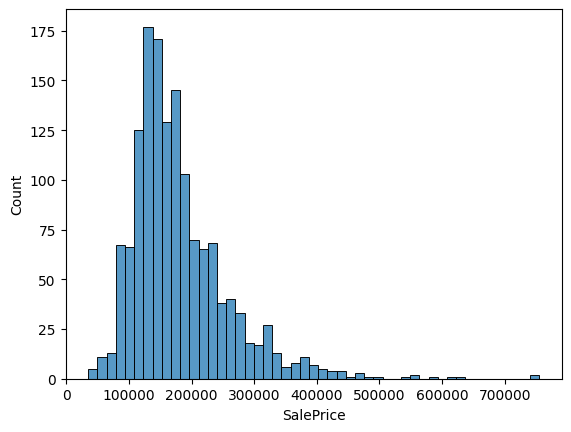

In [7]:
sns.histplot(dataset_train['SalePrice']);
#Histograma do SalePrice

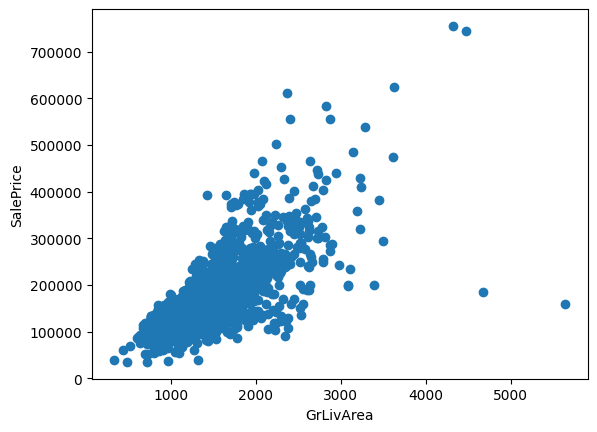

In [8]:
fig, ax = plt.subplots()
ax.scatter(x = dataset_train['GrLivArea'], y = dataset_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('GrLivArea', fontsize=10)
plt.show()

#GrLivArea = Pés quadrados no nível do solo
#Vemos no canto inferior direito dois com GrLivArea extremamente grandes e com preço baixo. 


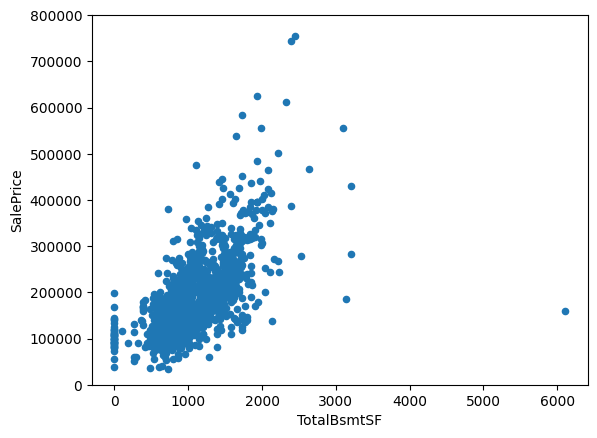

In [9]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([dataset_train['SalePrice'], dataset_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#TotalBsmtSF = Total de Pés quadrados na área do porão

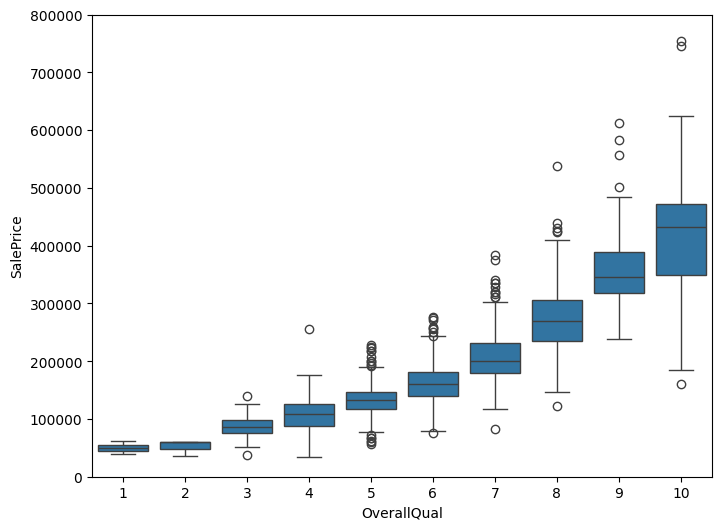

In [10]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([dataset_train['SalePrice'], dataset_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
#OverallQual = Material e qualidade do revestimento

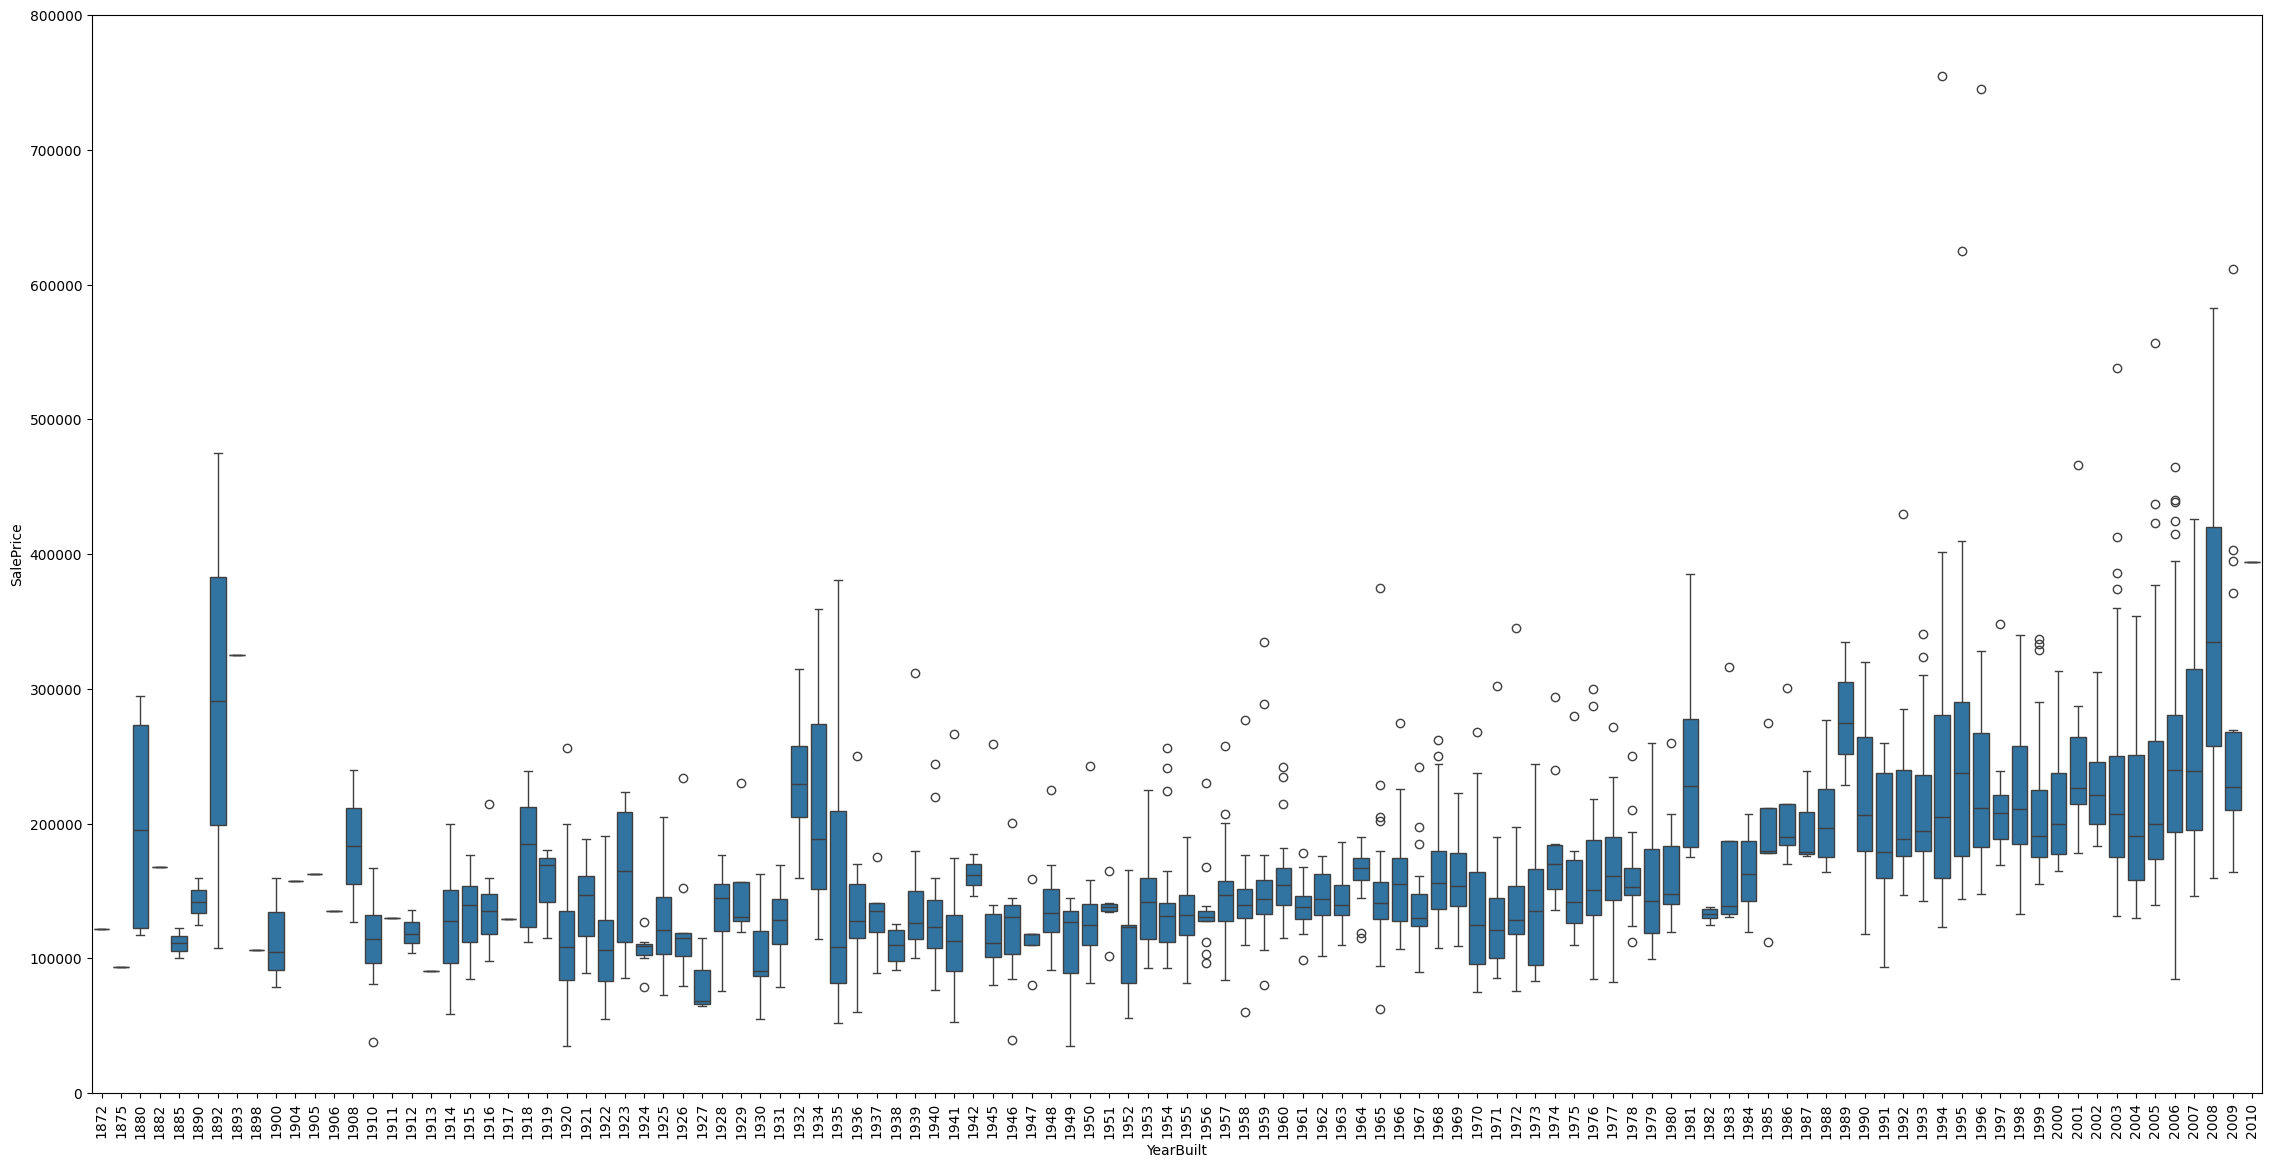

In [11]:
var = 'YearBuilt'
data = pd.concat([dataset_train['SalePrice'], dataset_train[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 14))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [12]:
# Selecionando as variáveis para a regressão
df_regressao = dataset_train[['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'OverallQual']]

# Verificando as primeiras linhas do DataFrame
df_regressao.head()

,SalePrice,GrLivArea,TotalBsmtSF,OverallQual
0,208500,1710,856,7
1,181500,1262,1262,6
2,223500,1786,920,7
3,140000,1717,756,7
4,250000,2198,1145,8


In [13]:
df_regressao.describe()


,SalePrice,GrLivArea,TotalBsmtSF,OverallQual
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,1515.463699,1057.429452,6.099315
std,79442.502883,525.480383,438.705324,1.382997
min,34900.000000,334.000000,0.000000,1.000000
25%,129975.000000,1129.500000,795.750000,5.000000
50%,163000.000000,1464.000000,991.500000,6.000000
75%,214000.000000,1776.750000,1298.250000,7.000000
max,755000.000000,5642.000000,6110.000000,10.000000


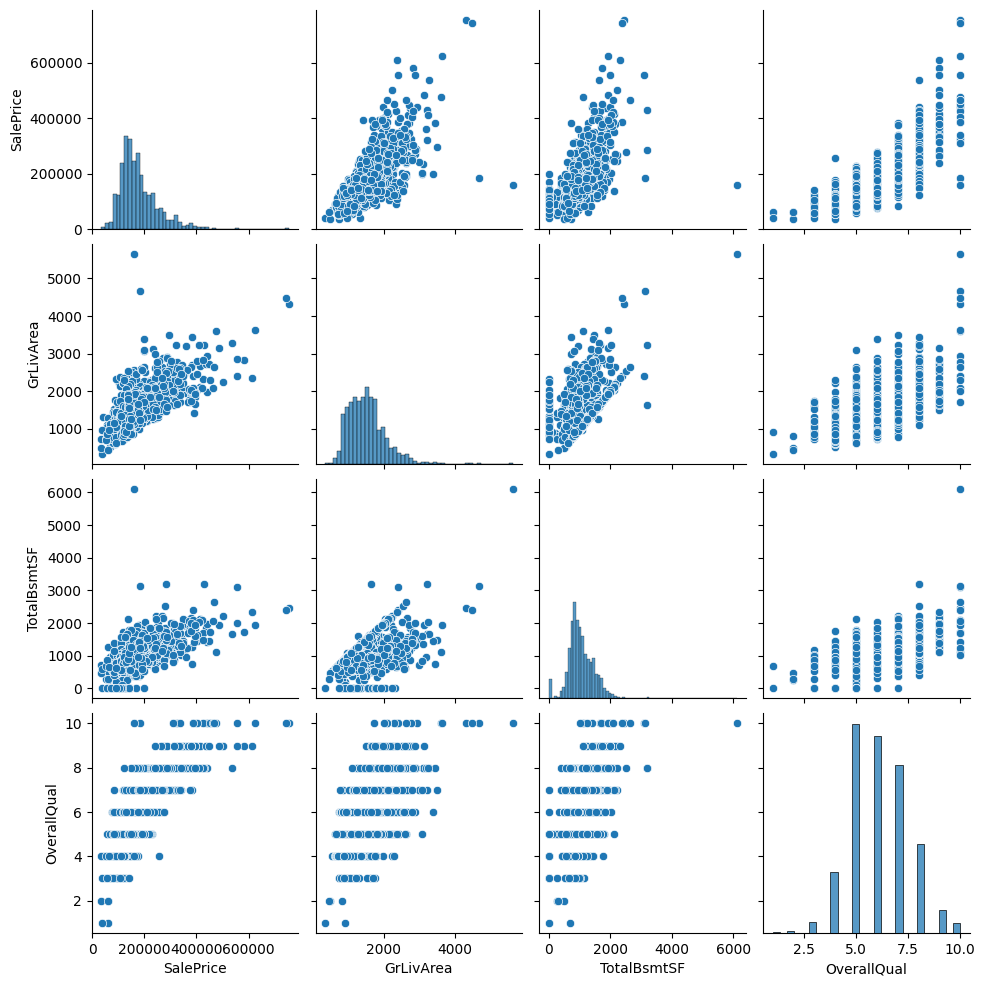

In [14]:
# Pairplot para visualizar as relações entre as variáveis
sns.pairplot(df_regressao)
plt.show()


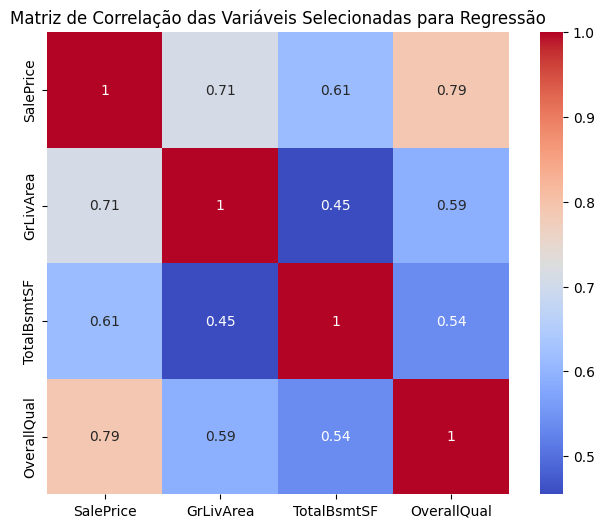

In [15]:
corr_matrix = df_regressao.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de Correlação das Variáveis Selecionadas para Regressão')
plt.show()

In [16]:
df_regressao = dataset_train[['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'OverallQual']].copy()
# Remover linhas com valores nulos, se houver
df_regressao.dropna(inplace=True)

# Separar variáveis independentes (X) e variável dependente (y)
X = df_regressao[['GrLivArea', 'TotalBsmtSF', 'OverallQual']]
y = df_regressao['SalePrice']

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar as variáveis de entrada
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Construção do modelo sequencial
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),  # Camada de entrada com o número de features
    tf.keras.layers.Dense(1)  # Camada densa com 1 neurônio para regressão linear
])

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

2024-06-17 21:28:46.129723: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-17 21:28:46.129968: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [18]:
# Treinar o modelo
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38955311104.0000 - mse: 38955311104.0000 - val_loss: 39654178816.0000 - val_mse: 39654178816.0000
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 36758761472.0000 - mse: 36758761472.0000 - val_loss: 39654158336.0000 - val_mse: 39654158336.0000
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 39199281152.0000 - mse: 39199281152.0000 - val_loss: 39654137856.0000 - val_mse: 39654137856.0000
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 39153565696.0000 - mse: 39153565696.0000 - val_loss: 39654117376.0000 - val_mse: 39654117376.0000
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 37962686464.0000 - mse: 37962686464.0000 - val_loss: 39654096896.0000 - val_mse: 39654096896.0000
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 38730575872.0000 - mse: 38730575872.0000 - val_loss: 39654072320.0000 - val_mse: 39654072320.0000
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 390924

In [19]:
# Fazendo previsões
y_pred = model.predict(X_test_scaled).flatten()

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE (Mean Squared Error): {mse}')
print(f'R2 Score: {r2}')


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MSE (Mean Squared Error): 39653104323.78681
R2 Score: -4.169676393506145


In [20]:
# Calculando a mediana dos preços de venda
median_price = dataset_train['SalePrice'].median()

# Criando variável binária para classificação
dataset_train['PriceCategory'] = pd.cut(dataset_train['SalePrice'], bins=[0, median_price, float('inf')], labels=['Low', 'High'])

# Verificando contagem de cada categoria
dataset_train['PriceCategory'].value_counts()

Low     732
High    728
Name: PriceCategory, dtype: int64

In [21]:
# Selecionando features para a classificação
features = ['GrLivArea', 'TotalBsmtSF', 'OverallQual']

# Separando variáveis independentes (X) e variável dependente (y)
X = dataset_train[features]
y = dataset_train['PriceCategory']

# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizando as variáveis de entrada (opcional, mas pode melhorar o desempenho do modelo)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Criando e treinando o modelo de classificação
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Prevendo os valores para o conjunto de teste
y_pred = model.predict(X_test_scaled)

# Avaliando o desempenho do modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Matriz de Confusão:
[[113  18]
 [ 17 144]]

Relatório de Classificação:
              precision    recall  f1-score   support

        High       0.87      0.86      0.87       131
         Low       0.89      0.89      0.89       161

    accuracy                           0.88       292
   macro avg       0.88      0.88      0.88       292
weighted avg       0.88      0.88      0.88       292



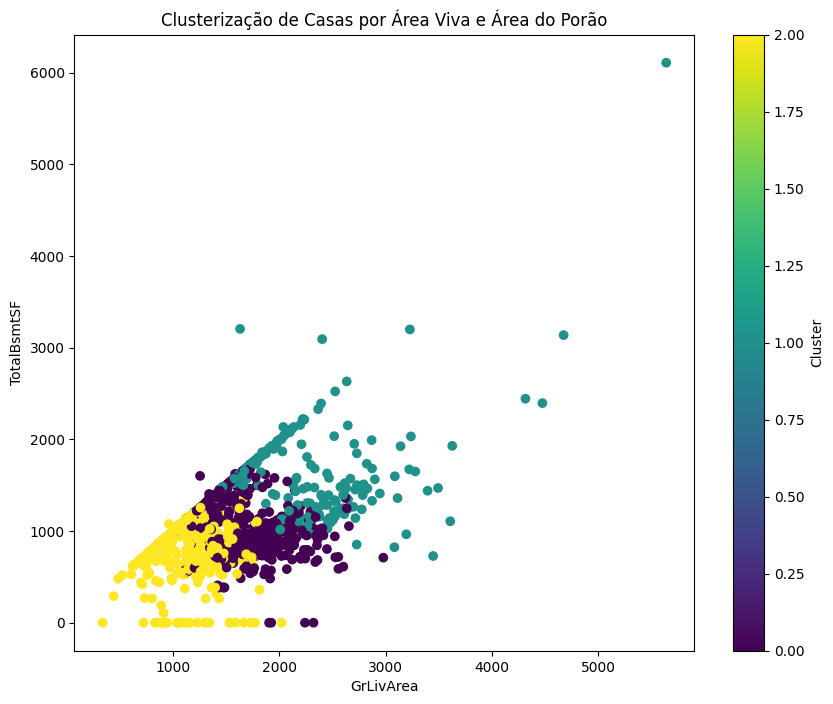

In [23]:
cluster_features = ['GrLivArea', 'TotalBsmtSF', 'OverallQual']

# Criando subset do dataset para clusterização
X_cluster = dataset_train[cluster_features]

# Normalizar os dados (opcional, mas geralmente recomendado para algoritmos baseados em distância)
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Aplicando o algoritmo de clusterização (exemplo com KMeans)
kmeans = KMeans(n_clusters=3, random_state=42)
dataset_train['Cluster'] = kmeans.fit_predict(X_cluster_scaled)

# Visualizar os clusters em relação a duas features (GrLivArea e TotalBsmtSF)
plt.figure(figsize=(10, 8))
plt.scatter(dataset_train['GrLivArea'], dataset_train['TotalBsmtSF'], c=dataset_train['Cluster'], cmap='viridis')
plt.title('Clusterização de Casas por Área Viva e Área do Porão')
plt.xlabel('GrLivArea')
plt.ylabel('TotalBsmtSF')
plt.colorbar(label='Cluster')
plt.show()

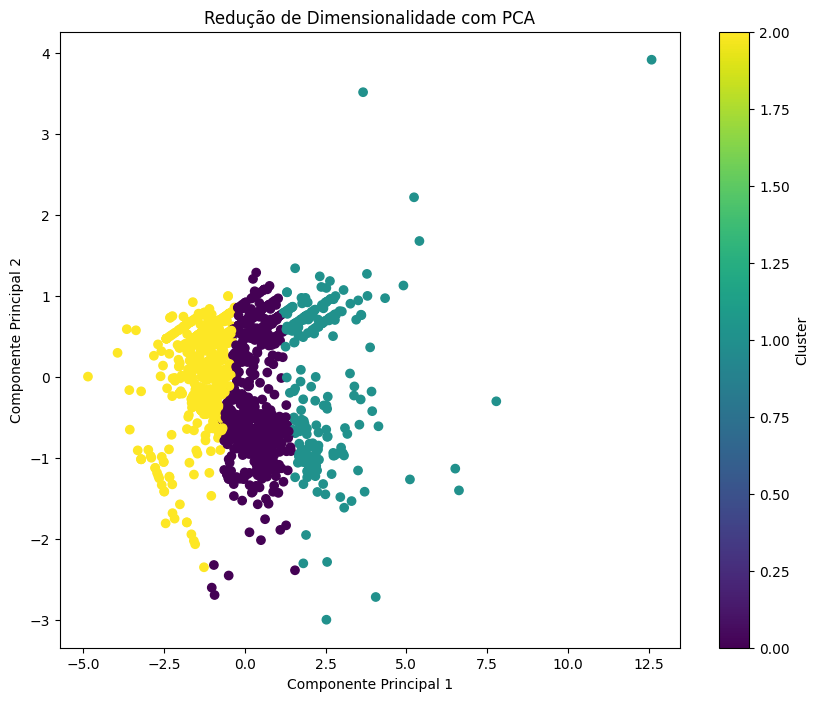

In [24]:
# Selecionar as features para PCA
pca_features = ['GrLivArea', 'TotalBsmtSF', 'OverallQual']

# Criar subset do dataset para PCA
X_pca = dataset_train[pca_features]

# Normalizar os dados
scaler = StandardScaler()
X_pca_scaled = scaler.fit_transform(X_pca)

# Aplicar PCA
pca = PCA(n_components=2, random_state=42)
X_pca_transformed = pca.fit_transform(X_pca_scaled)

# Criar DataFrame com os componentes principais
df_pca = pd.DataFrame(data=X_pca_transformed, columns=['Componente 1', 'Componente 2'])
df_pca['Cluster'] = dataset_train['Cluster']  # Adicionar os clusters como uma coluna

# Visualizar os clusters após a redução de dimensionalidade
plt.figure(figsize=(10, 8))
plt.scatter(df_pca['Componente 1'], df_pca['Componente 2'], c=df_pca['Cluster'], cmap='viridis')
plt.title('Redução de Dimensionalidade com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

In [25]:
df_association = dataset_train[['OverallQual', 'GarageCars', 'FullBath', 'KitchenQual']]
# Convertendo para o formato de transações
transactions = dataset_train.apply(lambda row: [col for col in dataset_train.columns if row[col] == 1], axis=1).tolist()

# Transformando transações em formato adequado
te = TransactionEncoder()
df = pd.DataFrame(te.fit_transform(transactions), columns=te.columns_)

# Aplicando o algoritmo Apriori e gerando regras de associação
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=1)

# Exibindo regras de associação
print("Regras de associação:")
for index, rule in rules.iterrows():
    print(f"Regra: {set(rule['antecedents'])} -> {set(rule['consequents'])}, Suporte: {rule['support']}, Confiança: {rule['confidence']}")

# Ordenando e exibindo as 5 primeiras regras por lift
sorted_rules = rules.sort_values(by='lift', ascending=False).head(5)
print("\nTop 5 regras por lift:")
for index, rule in sorted_rules.iterrows():
    print(f"Regra: {set(rule['antecedents'])} -> {set(rule['consequents'])}, Suporte: {rule['support']}, Confiança: {rule['confidence']}, Lift: {rule['lift']}")

Regras de associação:
Regra: {'BsmtFullBath', 'Fireplaces'} -> {'KitchenAbvGr'}, Suporte: 0.18287671232876712, Confiança: 1.0
Regra: {'BsmtFullBath', 'HalfBath'} -> {'KitchenAbvGr'}, Suporte: 0.136986301369863, Confiança: 1.0
Regra: {'Cluster', 'Fireplaces'} -> {'KitchenAbvGr'}, Suporte: 0.12054794520547946, Confiança: 1.0

Top 5 regras por lift:
Regra: {'BsmtFullBath', 'Fireplaces'} -> {'KitchenAbvGr'}, Suporte: 0.18287671232876712, Confiança: 1.0, Lift: 1.0488505747126438
Regra: {'BsmtFullBath', 'HalfBath'} -> {'KitchenAbvGr'}, Suporte: 0.136986301369863, Confiança: 1.0, Lift: 1.0488505747126438
Regra: {'Cluster', 'Fireplaces'} -> {'KitchenAbvGr'}, Suporte: 0.12054794520547946, Confiança: 1.0, Lift: 1.0488505747126438


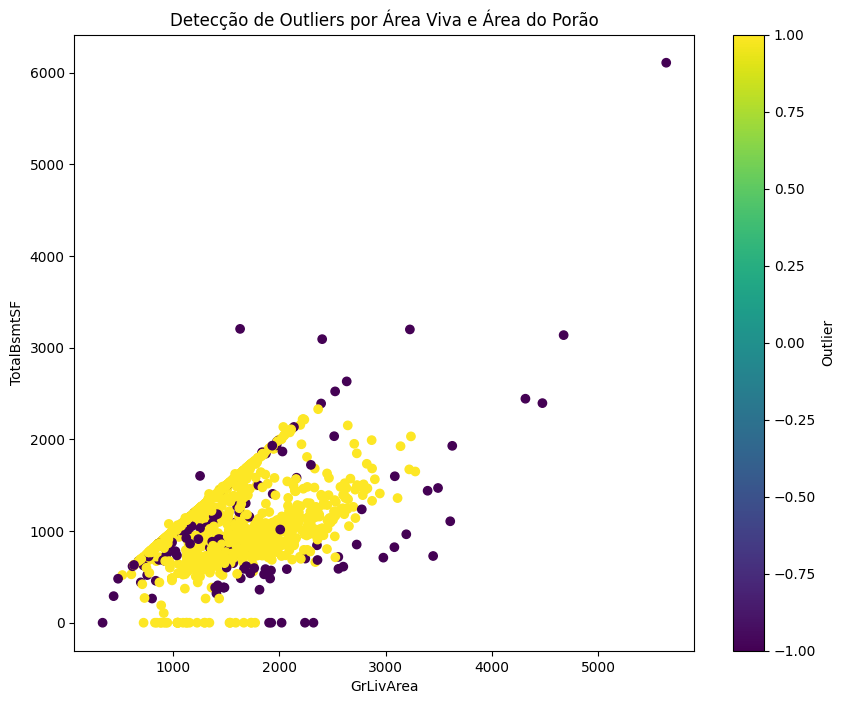

In [26]:


# Selecionando as features para detecção de outliers
outlier_features = ['GrLivArea', 'TotalBsmtSF', 'OverallQual']

# Criando subset do dataset para detecção de outliers
X_outliers = dataset_train[outlier_features]

# Normalizar os dados
scaler = StandardScaler()
X_outliers_scaled = scaler.fit_transform(X_outliers)

# Aplicar o algoritmo Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
dataset_train['Outlier'] = lof.fit_predict(X_outliers_scaled)

# Visualizar os outliers em relação a duas features (GrLivArea e TotalBsmtSF)
plt.figure(figsize=(10, 8))
plt.scatter(dataset_train['GrLivArea'], dataset_train['TotalBsmtSF'], c=dataset_train['Outlier'], cmap='viridis')
plt.title('Detecção de Outliers por Área Viva e Área do Porão')
plt.xlabel('GrLivArea')
plt.ylabel('TotalBsmtSF')
plt.colorbar(label='Outlier')
plt.show()
